<a href="https://colab.research.google.com/github/anup-ghosh/Machine_Learning_Course/blob/main/Candy_data_set_with_linearregression_threshold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [19]:
url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/candy-power-ranking/candy-data.csv'
data = pd.read_csv(url)

In [20]:
# Splitting the data into train and test sets
train_df, test_df = train_test_split(data, test_size=0.2, random_state=42)

In [21]:
# Defining features and target for training and testing
features = ['fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer',
            'hard', 'bar', 'pluribus', 'sugarpercent', 'pricepercent', 'winpercent']
X_train = train_df[features]
y_train = train_df['chocolate']
X_test = test_df[features]
y_test = test_df['chocolate']

In [9]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
# Step 4: Train a Linear Regression Model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [23]:
# Step 5: Make Predictions
y_pred = model.predict(X_test_scaled)

In [24]:
# Step 6: Convert Continuous Predictions to Binary
# Apply a threshold of 0.5 to decide whether the candy is chocolate (1) or not (0)
y_pred_binary = (y_pred >= 0.5).astype(int)

In [25]:
# Step 7: Evaluate the Model with Accuracy and Classification Report
accuracy = accuracy_score(y_test, y_pred_binary)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_binary))

Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         8

    accuracy                           1.00        17
   macro avg       1.00      1.00      1.00        17
weighted avg       1.00      1.00      1.00        17



In [26]:
# Step 8: Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[9 0]
 [0 8]]


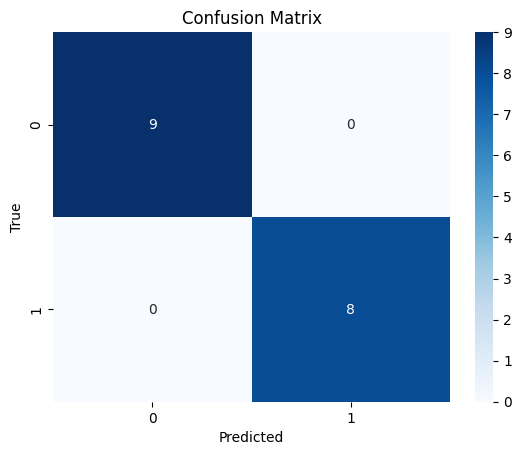

In [27]:
# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [28]:
# Step 9: Tabular Output with Each Candy's ID, Predicted Value, and True Label
# Assuming there is an 'id' or 'competitorname' column in the dataset for identifying candies
result_df = test_df.copy()
result_df['predicted_chocolate'] = y_pred_binary
result_df['predicted_probability'] = y_pred
result_df['true_chocolate'] = y_test

In [29]:
# Display the first few rows of the result dataframe
print("\nTabular Output with Each Candy's ID, Predicted Value, and True Label:")
print(result_df[['competitorname', 'predicted_chocolate', 'predicted_probability', 'true_chocolate']])


Tabular Output with Each Candy's ID, Predicted Value, and True Label:
                 competitorname  predicted_chocolate  predicted_probability  \
78            Trolli Sour Bites                    0               0.073194   
0                     100 Grand                    1               1.012104   
68                    Starburst                    0               0.375800   
22             Hershey's Kisses                    1               0.615829   
12                     Chiclets                    0              -0.224991   
82         Welch's Fruit Snacks                    0               0.045144   
10              Charleston Chew                    1               0.522263   
18            Haribo Gold Bears                    0               0.258088   
4                     Air Heads                    0               0.155008   
66              Sour Patch Kids                    0               0.251257   
40                  Mr Good Bar                    1        